Number of classes 3
(72, 120, 120, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 118, 118, 32)      320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 116, 116, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               27558016  
_________________________________________________________________
dropout_8 (Dropout)          (None, 12

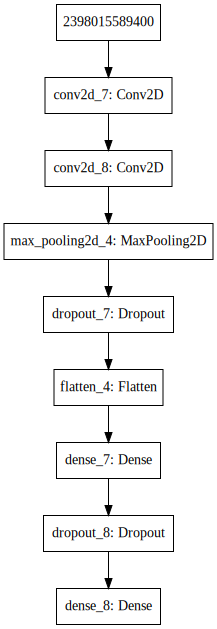

Train on 57 samples, validate on 15 samples
Epoch 1/10
57/57 [==============================] - 4s 65ms/step - loss: 5.7307 - acc: 0.3158 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 2/10
57/57 [==============================] - 2s 37ms/step - loss: 9.2829 - acc: 0.2982 - val_loss: 4.6658 - val_acc: 0.3333
Epoch 3/10
57/57 [==============================] - 2s 38ms/step - loss: 2.6405 - acc: 0.4561 - val_loss: 0.7698 - val_acc: 1.0000
Epoch 4/10
57/57 [==============================] - 2s 38ms/step - loss: 0.6788 - acc: 0.9123 - val_loss: 0.5659 - val_acc: 0.8000
Epoch 5/10
57/57 [==============================] - 2s 42ms/step - loss: 0.6487 - acc: 0.6842 - val_loss: 0.3873 - val_acc: 0.8667
Epoch 6/10
57/57 [==============================] - 2s 37ms/step - loss: 0.3288 - acc: 0.9298 - val_loss: 0.1414 - val_acc: 1.0000
Epoch 7/10
57/57 [==============================] - 2s 36ms/step - loss: 0.1729 - acc: 0.9298 - val_loss: 0.5025 - val_acc: 0.6667
Epoch 8/10
57/57 [====================

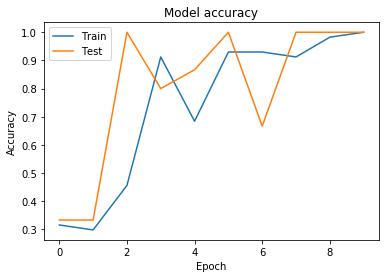

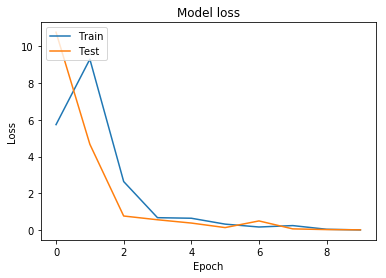

In [4]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Necessary import for the programm to run smoothly
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import tensorflow as tf
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from matplotlib import pyplot as plt
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# Specific classes for our data
classes = ["Efi's Signature", "Taki's Signature", "Stelio's Signature"]
num_classes = len(classes)

#Function that returns class name
def get_class_name(class_index):
    if class_index < 0 or class_index > 2:
        raise ValueError("Class Index must be > 0 and <= 2")
    return classes[class_index]

print("Number of classes", num_classes)

#Signature array and labels array that will hold the signature images and their labels respectively 
signatures = []
labels = []
        
#method that will change the storage of each character and remove the text before the '_' so the images can be stored storted.
def onlyname(img):
    image = img.split('_')
    splittedimage = image[1]
    image2 = splittedimage.split('.')
    outputimage = int(image2[0])
    return outputimage

#defyning the path were all the signatures are
listpath = os.listdir('signatures')
#applying the onlyname method on every image file name
listpath = sorted(map(onlyname, listpath))


for label in listpath:
    #Define the signature path
    signature = imread("signatures/Screenshot_" + str(label) + ".jpg")
    grayscale = np.zeros((120,120))
    #Convert image to grayscale
    for x in range(120):
        for y in range(120):
            r = signature[x,y,0]
            g = signature[x,y,1]
            b = signature[x,y,2]
            grayscale[x,y] = 0.2125*r + 0.7154*g + 0.0721*b
    #Add image to signatures array
    signatures.append(grayscale)

#Assign labels to our images    
for i in range(72):
    if i < 24:
        labels.append("0")
    if i >= 24 and i < 48:
        labels.append("1")
    if i >= 48 and i < 72:
        labels.append("2")

#convert our signatures and labels arrays to numpy arrays
signatures = np.array(signatures)
labels = np.array(labels)
samples, x, y = signatures.shape
#reshaping signatures array from 3 dimensions to 4.
signatures = signatures.reshape((samples,x,y,1))
#splitting the dataset to training and testing. 80% of data will be used for training and 20% will be used for testing
signatures_train, signatures_test, labels_train, labels_test = train_test_split(signatures, labels, test_size=0.2, random_state=1, stratify=labels)
print(signatures.shape)
labels_train = keras.utils.to_categorical(labels_train, num_classes)
labels_test = keras.utils.to_categorical(labels_test, num_classes)

#Convert from one_hot to label function
def one_hot_to_label(one_hot):
     return np.argmax(one_hot)

#Normalize our dataset
signatures_train = signatures_train.astype('float32')
signatures_test = signatures_test.astype('float32')
signatures_train /= 255
signatures_test /= 255

#Select activation function
Activation('relu')

#Specify batch size and number of epochs
batch_size = 32
epochs = 10

#Defyning our model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(120,120,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

display(SVG(model_to_dot(model).create(prog='dot', format='svg')))

#Fit our dataset into the model
history = model.fit(signatures_train, labels_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(signatures_test, labels_test))
#Print Accurasy score and loss score
score = model.evaluate(signatures_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()